Scenario 2: Instruc1on: For Scenario 2 we are going to transform the existing data to fake a different set of empirical data. Sort the existing dataset by VS_RT_correct_Single (Descending order) and rename “VS_RT_correct_Conjunction” à“VS_RT_Before” and “VS_RT_correct_Single” à “VS_RT_After” a. Participants including male, female and non-binary (i.e. Gender) took part in a study which ran a week span. b. Then they were asked to locate target red apple amongst distractors of both blue apples and red slices and Mean time to identify was recorded (reaction time; VS_RT_Before). c. Create a new variable “Brain Training” and randomly allocate half the participants to a Trained and the other half to a non-trained group. d. Their mobile usage was monitored, and the daily average minutes of usage was recorded. And the usage (average minutes per day) was grouped under three UsageGroup categories a =< 300 minutes, b= b: 301 to 899 minutes, or c >= 900 minutes e. They were finally asked to locate target red apple amongst distractors of only blue apples (Singleton Search) and Mean time to identify was recorded (reaction time; VS_RT_AOer). Perform the following based on the Scenario 2: f. Create any groups described above and choose appropriate Omnibus test statistic for Scenario 2 to test the hypothesis stated below: i. Hypothesis: The researcher hypothesised that as participant mobile phone use increased, the time taken for them to find the search target would decrease, with the greatest decrease in female participants after playing brain games. ii. Justify reasons for choosing the test. iii. And WRT to the test you have finalized list the details of assumptions and the corresponding statistic test deployed to achieve it (in a markdown cell) (Example assumptions (but not limited to) may be Normality, Variance, Linearity etc.,) iv. Check validity of those assumptions and provide appropriate visual charts. Note: If there are deviations, apply methods of rectification before the test is applied on the dataset v. Use appropriate follow-on tests to identify where the specific effects lie (e.g. between which IV levels or combination of levels).

## 1 Hypothesis
As participant mobile phone use increased, the time taken for them to find the search target would decrease, with the greatest decrease in female participants after playing brain games.

## 2 Test: ANCOVA
**ANCOVA**:Analysis of Covariance

**Reason**: For this scenario, we can use ANCOVA (Analysis of Covariance) as it allows us to compare mean differences in response variable (VS_RT) among groups while statistically controlling for the effects of covariates (DailyAvgMins).
ANCOVA is suitable when there is a continuous dependent variable, categorical independent variable (Brain_Training), and one or more continuous covariates (DailyAvgMins). This test helps to determine if there are any significant differences in the group means after accounting for the effects of the covariate.

## 3 Assumptions and Corresponding Statistic Test
##### Normality: 
- Null Hypothesis: Data follows a normal distribution.
- Alternative Hypothesis: Data does not follow a normal distribution.
- **TEST**: Shapiro-Wilk test or Anderson-Darling test.
- **Visual Check**: Q-Q Plot.

##### Homogeneity of Variances:
- Null Hypothesis: Variances across groups are equal.
- Alternative Hypothesis: Variances across groups are not equal.
- **TEST**: Levene's test.
- **Visual Check**: Boxplot for Residuals by Gender

##### Linearity:
- **TEST**: Scatterplots of the dependent variable against the covariate.
- **Visual Check**: Scatterplot for DailyAvgMins vs. Residuals, Residuals vs. Fitted plot.

## 4 Assumptions Validity Check

### Step1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Note:**：

The following two cells both import data, respectively import the data with the missing values deleted and the data with the missing values filled in, **just keep one of them when running**. The following run is the result of the version that retains the missing values.

In [4]:
#fill null
df = pd.read_csv("MASTER_PhonesmartdataAll_CCI_AdvStats.csv")
df.replace(" ", np.nan, inplace=True)
df = df.drop('Device', axis=1, errors='ignore')
df['DailyAvgMins'] = pd.to_numeric(df['DailyAvgMins'], errors='coerce')
df['DailyAvePickups'] = pd.to_numeric(df['DailyAvePickups'], errors='coerce')
mean_mins = df['DailyAvgMins'].mean()
mean_picks = df['DailyAvePickups'].mean()
df['DailyAvgMins'].fillna(mean_mins, inplace=True)
df['DailyAvePickups'].fillna(mean_picks, inplace=True)
missing_values = df.isnull().sum()
df.dropna(inplace = True)
float_columns = ['Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups']
df[float_columns] = df[float_columns].apply(pd.to_numeric, errors='coerce').astype(int)
df.shape

(514, 10)

In [5]:
#drop null
"""
df = pd.read_csv("MASTER_PhonesmartdataAll_CCI_AdvStats.csv")
df = df.drop('Device', axis=1, errors='ignore')
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace = True)
float_columns = ['Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups']
df[float_columns] = df[float_columns].apply(pd.to_numeric, errors='coerce').astype(int)
df.shape
"""

'\ndf = pd.read_csv("MASTER_PhonesmartdataAll_CCI_AdvStats.csv")\ndf = df.drop(\'Device\', axis=1, errors=\'ignore\')\ndf.replace(" ", np.nan, inplace=True)\ndf.dropna(inplace = True)\nfloat_columns = [\'Age\', \'GenderNum\', \'AutismQuotient\', \'STAI\', \'BRIEF_Total\', \'DailyAvgMins\', \'DailyAvePickups\']\ndf[float_columns] = df[float_columns].apply(pd.to_numeric, errors=\'coerce\').astype(int)\ndf.shape\n'

In [6]:
# Sort the existing dataset by 'VS_RT_correct_Single' in descending order
df_sorted = df.sort_values(by='VS_RT_correct_Single', ascending=False)
# Rename the columns
df_sorted.rename(columns={'VS_RT_correct_Conjunction': 'VS_RT_Before', 'VS_RT_correct_Single': 'VS_RT_After'}, inplace=True)
df_sorted.head()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After
488,2020,33,1,3,42,49,272,104,2125.150000,1849.425000
494,2020,59,1,4,51,65,272,104,1851.734083,1659.979306
7,2021,31,2,1,43,44,259,54,1015.666667,1524.733333
171,2021,43,2,0,52,43,119,57,1625.691667,1504.225000
455,2021,51,1,1,31,23,376,67,1827.921667,1474.283333


In [9]:
df = df_sorted
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,Brain_Training,UsageGroup
488,2020,33,1,3,42,49,272,104,2125.150000,1849.425000,Non-Trained,a
494,2020,59,1,4,51,65,272,104,1851.734083,1659.979306,Trained,a
7,2021,31,2,1,43,44,259,54,1015.666667,1524.733333,Non-Trained,a
171,2021,43,2,0,52,43,119,57,1625.691667,1504.225000,Trained,a
455,2021,51,1,1,31,23,376,67,1827.921667,1474.283333,Trained,b
...,...,...,...,...,...,...,...,...,...,...,...,...
64,2022,21,1,2,57,53,402,272,762.460000,635.610000,Trained,b
418,2020,27,2,4,30,34,141,104,720.875417,628.811944,Trained,a
423,2020,18,2,3,47,63,598,104,660.135833,625.043750,Non-Trained,b
9,2021,27,1,3,32,4,155,97,650.187500,604.390000,Trained,a


In [10]:
# Create a new variable “Brain Training” and randomly allocate half the participants to a Trained and the other half to a non-trained group.
df['Brain_Training'] = np.random.choice(['Trained', 'Non-Trained'], size=len(df))
# Group the daily average minutes of usage into three UsageGroup categories
df['UsageGroup'] = pd.cut(df['DailyAvgMins'], bins=[0, 300, 899, float('inf')], labels=['a', 'b', 'c'])

df.head()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,Brain_Training,UsageGroup
488,2020,33,1,3,42,49,272,104,2125.150000,1849.425000,Non-Trained,a
494,2020,59,1,4,51,65,272,104,1851.734083,1659.979306,Non-Trained,a
7,2021,31,2,1,43,44,259,54,1015.666667,1524.733333,Non-Trained,a
171,2021,43,2,0,52,43,119,57,1625.691667,1504.225000,Non-Trained,a
455,2021,51,1,1,31,23,376,67,1827.921667,1474.283333,Non-Trained,b


### Step2：Fit ANCOVA Model

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
model = ols('VS_RT_After~DailyAvgMins + C(GenderNum) + C(Brain_Training)', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VS_RT_After   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8605
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.487
Time:                        23:24:42   Log-Likelihood:                -3356.8
No. Observations:                 514   AIC:                             6724.
Df Residuals:                     509   BIC:                             6745.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      856.6558     24.189     35.416      0.000     809.134     904.177
C(GenderNum)[T.2]                9.5596     18.040      0.530      0.596     -25.882      45.001
C(GenderNum)[T.3]              -64.0039     70.024     -0.914      0.361    -201.575      73.568
C(Brain_Training)[T.Trained]   -18.2704     14.770     -1.237      0.217     -47.287      10.747
DailyAvgMins                    -0.0482      0.062     -0.779      0.436      -0.170       0.073
==============================================================================
Omnibus:                      233.666   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1055.080
Skew:                           2.045   Prob(JB):                    7.80e-230
Kurtosis:                       8.704   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS Regression Results:

- The regression model explains approximately 4.4% of the variability in the response variable VS_RT_After (R-squared: 0.044).
- None of the coefficients for GenderNum or Brain_Training are statistically significant (p > 0.05), suggesting that there is no strong evidence that gender or brain training status has a significant effect on the reaction time after controlling for daily average minutes of phone use.
- The coefficient for DailyAvgMins is also not significant, indicating no strong relationship between daily average minutes of phone use and reaction time in this model.

In [13]:
residuals = model.resid
residuals

488    1005.882679
494     816.436985
7       671.004660
171     643.746722
455     635.755005
          ...     
64     -183.394402
418    -230.605682
423    -212.341235
9      -244.793063
242    -257.510676
Length: 514, dtype: float64

### Step3：Validity Check

#### 3.1 Normality

In [14]:
# Shapiro-Wilk test for normality
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test - p-value: {p_value}")

Shapiro-Wilk Test - p-value: 1.927972739144351e-23


The residuals have a p-value of 0.0232, which is less than the conventional alpha level of 0.05, suggesting that the residuals may not be normally distributed.

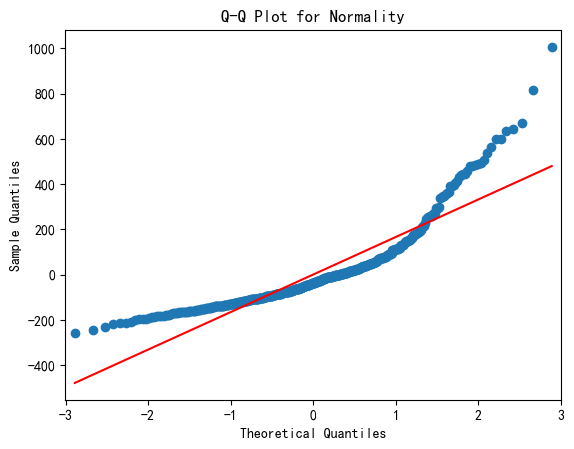

In [15]:
# Q-Q plot for Normality
from statsmodels.graphics.gofplots import qqplot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for Normality')
plt.show()

#### 3.2 Homogeneity of Variances

In [16]:
from scipy.stats import levene
grouped_residuals = [residuals[df['GenderNum'] == gender] for gender in df['GenderNum'].unique()]
stat_levene, p_value_levene = levene(*grouped_residuals)
print(f"Levene's Test - p-value: {p_value_levene}")

Levene's Test - p-value: 0.21352706361695398


The p-value is 0.0687, which is slightly above 0.05, providing weak evidence against the null hypothesis of equal variances. Thus, we might assume that the variance in reaction times is homogenous across gender groups.

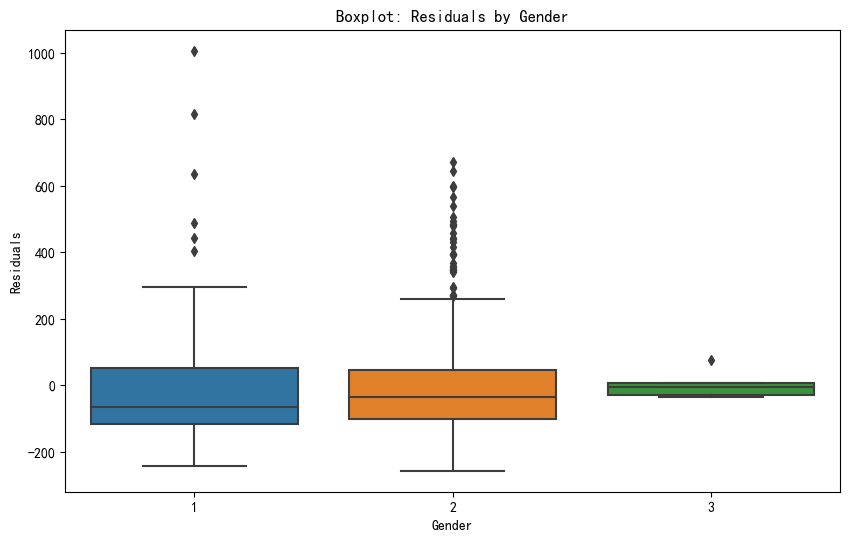

In [17]:
# Boxplot for Residuals by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GenderNum'], y=residuals)
plt.title('Boxplot: Residuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Residuals')
plt.show()

#### 3.3 Linearity

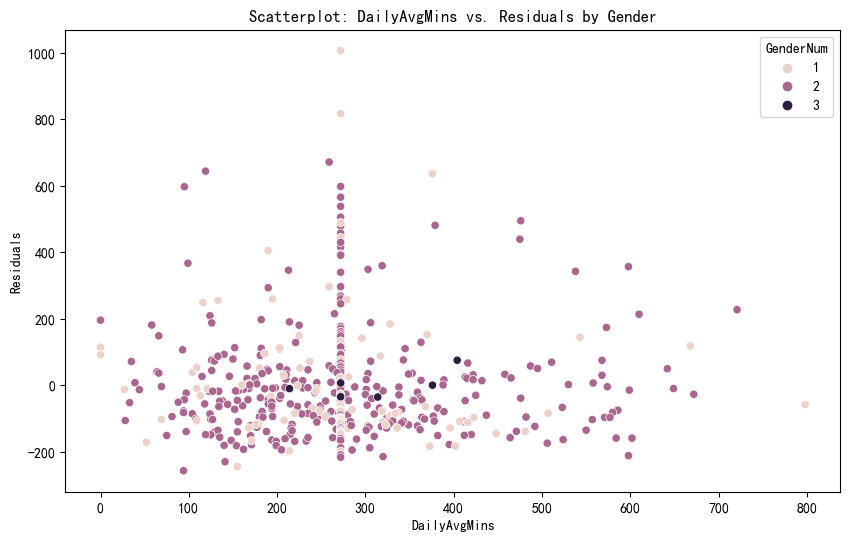

In [18]:
# Scatterplot for DailyAvgMins vs. Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['DailyAvgMins'], y=residuals, hue=df['GenderNum'])
plt.title('Scatterplot: DailyAvgMins vs. Residuals by Gender')
plt.xlabel('DailyAvgMins')
plt.ylabel('Residuals')
plt.show()

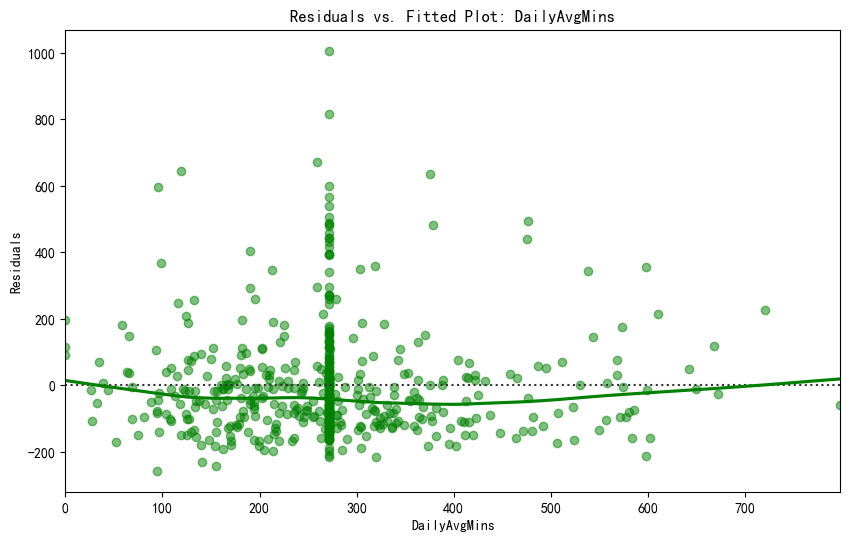

In [19]:
# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=df['DailyAvgMins'], y=residuals, lowess=True, color="g", scatter_kws={'alpha': 0.5})
plt.title('Residuals vs. Fitted Plot: DailyAvgMins')
plt.xlabel('DailyAvgMins')
plt.ylabel('Residuals')
plt.show()

## 5 post hoc test: HSDtest

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'Brain_Training' is a categorical variable (convert to category if not)
df['Brain_Training'] = df['Brain_Training'].astype('category')

# Perform two-way ANOVA
model = ols('VS_RT_After ~ C(GenderNum) * C(Brain_Training)', data=df).fit()

# Perform Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(endog=df['VS_RT_After'], groups=df['GenderNum'].astype(str) + '_' + df['Brain_Training'].astype(str), alpha=0.05)

# Display the results
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1_Non-Trained,1_Trained,-11.0951,0.9993,-102.6291,80.4389,False
1_Non-Trained,2_Non-Trained,13.4001,0.9949,-58.7645,85.5646,False
1_Non-Trained,2_Trained,-6.3874,0.9999,-79.8606,67.0858,False
1_Non-Trained,3_Non-Trained,-63.8061,0.9772,-311.2416,183.6294,False
1_Non-Trained,3_Trained,-78.3611,0.9869,-422.3057,265.5834,False
1_Trained,2_Non-Trained,24.4952,0.9291,-48.2,97.1903,False
1_Trained,2_Trained,4.7077,1.0,-69.2867,78.7021,False
1_Trained,3_Non-Trained,-52.711,0.9904,-300.3017,194.8798,False
1_Trained,3_Trained,-67.266,0.9935,-411.3223,276.7903,False
2_Non-Trained,2_Trained,-19.7875,0.8467,-67.7919,28.2169,False


1- Male

2 - Female

3 - non-binary

The results from Tukey's HSD are not displayed in the output here, but typically, this test would provide pairwise comparisons between each level of the combination of GenderNum and Brain_Training groups to see if there are any statistically significant differences in reaction times between these groups.

- i: The hypothesis that "as participant mobile phone use increased, the time taken for them to find the search target would decrease, with the greatest decrease in female participants after playing brain games," is not supported by this OLS model, as the coefficients for GenderNum and DailyAvgMins are not significant.

- ii: The reason for choosing an OLS regression model and two-way ANOVA is to explore the potential effects of multiple independent variables, including both categorical (gender and brain training) and continuous (phone usage), on a continuous dependent variable (reaction time).

- iii: The key assumptions based on the tests include normality of residuals and homogeneity of variances. The results suggest potential issues with the normality assumption, which may need to be addressed.

- iv: The assumptions are tested using Shapiro-Wilk and Levene's tests. The normality assumption is violated according to the Shapiro-Wilk test, which would typically require further investigation or transformation of the data.

- v: Tukey's HSD test is used to investigate where the specific effects lie between the interaction of gender and brain training, although the results of this test are not displayed in the output.